# Huffman Coding Implementation

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
import heapq
import warnings
warnings.filterwarnings('ignore')

In [23]:
print("\n🔵 HUFFMAN CODING")
print("Adaptive coding - the practical application of information theory!")

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    
    def __lt__(self, other):
        return self.freq < other.freq


🔵 HUFFMAN CODING
Adaptive coding - the practical application of information theory!


In [24]:
def build_huffman_tree(text):
    """Build Huffman tree from text"""
    # Count frequencies
    freq_count = Counter(text)
    
    # Create priority queue (min-heap)
    heap = [Node(char, freq) for char, freq in freq_count.items()]
    heapq.heapify(heap)
    
    # Build tree
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        
        heapq.heappush(heap, merged)
    
    return heap[0] if heap else None

In [25]:
def generate_huffman_codes(root):
    """Generate Huffman codes from tree"""
    if not root:
        return {}
    
    codes = {}
    
    def generate_codes_helper(node, code):
        if node:
            if node.char is not None:  # Leaf node
                codes[node.char] = code if code else '0'  # Handle single character case
            else:
                generate_codes_helper(node.left, code + '0')
                generate_codes_helper(node.right, code + '1')
    
    generate_codes_helper(root, '')
    return codes

In [26]:
def huffman_encode(text, codes):
    """Encode text using Huffman codes"""
    return ''.join(codes[char] for char in text)

def calculate_compression_ratio(original_text, encoded_bits):
    """Calculate compression ratio"""
    original_bits = len(original_text) * 8  # 8 bits per character in ASCII
    compressed_bits = len(encoded_bits)
    return compressed_bits / original_bits

# Demonstrate Huffman coding
short_text = "hello world! this is a test message for huffman coding."
print(f"📝 Original text: '{short_text}'")
print(f"📏 Length: {len(short_text)} characters")

# Build Huffman tree and generate codes
root = build_huffman_tree(short_text)
huffman_codes = generate_huffman_codes(root)

📝 Original text: 'hello world! this is a test message for huffman coding.'
📏 Length: 55 characters


In [27]:
# Show some codes
print("\n🔤 Huffman Codes (sample):")
sorted_codes = sorted(huffman_codes.items(), key=lambda x: len(x[1]))
for char, code in sorted_codes[:10]:  # Show first 10
    char_display = char if char != ' ' else 'SPACE'
    print(f"   '{char_display}': {code}")

# Encode the text
encoded_text = huffman_encode(short_text, huffman_codes)
compression_ratio = calculate_compression_ratio(short_text, encoded_text)


🔤 Huffman Codes (sample):
   's': 000
   'SPACE': 111
   'h': 0010
   'i': 0100
   't': 0101
   'a': 0110
   'l': 0111
   'f': 1000
   'o': 1010
   'e': 1100


In [28]:
print(f"\n📊 Compression Results:")
print(f"   • Original size: {len(short_text) * 8} bits ({len(short_text)} chars × 8 bits)")
print(f"   • Compressed size: {len(encoded_text)} bits")
print(f"   • Compression ratio: {compression_ratio:.3f}")
print(f"   • Space saved: {(1-compression_ratio)*100:.1f}%")


📊 Compression Results:
   • Original size: 440 bits (55 chars × 8 bits)
   • Compressed size: 225 bits
   • Compression ratio: 0.511
   • Space saved: 48.9%


In [29]:
# Visualize code lengths
char_frequencies = Counter(short_text)
code_lengths = [(char, len(huffman_codes[char]), freq) 
                for char, freq in char_frequencies.most_common()]

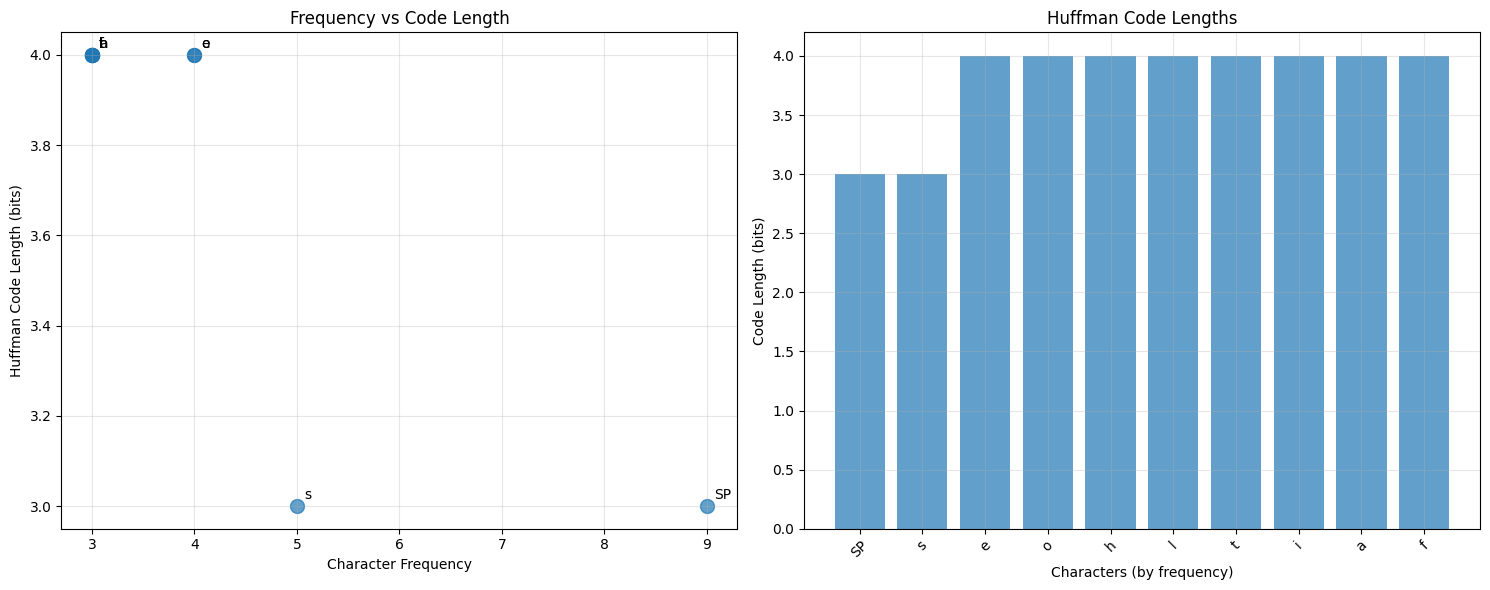

In [30]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Frequency vs Code Length
chars = [c if c != ' ' else 'SP' for c, _, _ in code_lengths[:10]]
frequencies = [f for _, _, f in code_lengths[:10]]
lengths = [l for _, l, _ in code_lengths[:10]]

ax1.scatter(frequencies, lengths, s=100, alpha=0.7)
for i, char in enumerate(chars):
    ax1.annotate(char, (frequencies[i], lengths[i]), 
                xytext=(5, 5), textcoords='offset points')
ax1.set_xlabel('Character Frequency')
ax1.set_ylabel('Huffman Code Length (bits)')
ax1.set_title('Frequency vs Code Length')
ax1.grid(True, alpha=0.3)

# Code length distribution
ax2.bar(range(len(chars)), lengths, alpha=0.7)
ax2.set_xlabel('Characters (by frequency)')
ax2.set_ylabel('Code Length (bits)')
ax2.set_title('Huffman Code Lengths')
ax2.set_xticks(range(len(chars)))
ax2.set_xticklabels(chars, rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
print("\n🎓 Huffman Coding Insights:")
print("   • Frequent characters get shorter codes")
print("   • Rare characters get longer codes")
print("   • This minimizes total message length")
print("   • Optimal prefix-free coding algorithm")


🎓 Huffman Coding Insights:
   • Frequent characters get shorter codes
   • Rare characters get longer codes
   • This minimizes total message length
   • Optimal prefix-free coding algorithm
